## Before we start

* setting your workspace
* what is git?
* what is python?
* what is virtual environment?
* what is jupyter notebook?
* primitive data types
* complex data types
* objects
* basic syntax: if .. else, for, while
* functions, arguments and parameters
* modules
* objects: arguments, parameters, properties and methods

In [1]:
isinstance(None, float)

False

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import multimodal
import scipy as sp

## Reading data

In [2]:
fname_raw = os.path.join(multimodal.data_path(), 'multimodal_raw.fif')
fname_raw

'/home/user/mne_data/MNE-multimodal-data/multimodal_raw.fif'

In [3]:
raw = mne.io.read_raw_fif(fname_raw, preload=True)

Opening raw data file /home/user/mne_data/MNE-multimodal-data/multimodal_raw.fif...
    Read a total of 7 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
    Range : 183600 ... 576599 =    305.687 ...   960.014 secs
Ready.
Reading 0 ... 392999  =      0.000 ...   654.328 secs...


In [21]:
raw.n_times

393000

In [22]:
raw.times

array([0.00000000e+00, 1.66496011e-03, 3.32992022e-03, ...,
       6.54324328e+02, 6.54325993e+02, 6.54327658e+02])

In [23]:
', '.join(raw.ch_names)

'MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG 0132, MEG 0133, MEG 0131, MEG 0143, MEG 0142, MEG 0141, MEG 0213, MEG 0212, MEG 0211, MEG 0222, MEG 0223, MEG 0221, MEG 0232, MEG 0233, MEG 0231, MEG 0243, MEG 0242, MEG 0241, MEG 0313, MEG 0312, MEG 0311, MEG 0322, MEG 0323, MEG 0321, MEG 0333, MEG 0332, MEG 0331, MEG 0343, MEG 0342, MEG 0341, MEG 0413, MEG 0412, MEG 0411, MEG 0422, MEG 0423, MEG 0421, MEG 0432, MEG 0433, MEG 0431, MEG 0443, MEG 0442, MEG 0441, MEG 0513, MEG 0512, MEG 0511, MEG 0523, MEG 0522, MEG 0521, MEG 0532, MEG 0533, MEG 0531, MEG 0542, MEG 0543, MEG 0541, MEG 0613, MEG 0612, MEG 0611, MEG 0622, MEG 0623, MEG 0621, MEG 0633, MEG 0632, MEG 0631, MEG 0642, MEG 0643, MEG 0641, MEG 0713, MEG 0712, MEG 0711, MEG 0723, MEG 0722, MEG 0721, MEG 0733, MEG 0732, MEG 0731, MEG 0743, MEG 0742, MEG 0741, MEG 0813, MEG 0812, MEG 0811, MEG 0822, MEG 0823, MEG 0821, MEG 0913, MEG 0912, MEG 0911, MEG 0923, MEG 0922, MEG 0921, MEG 0932, MEG 0933, MEG 0931, MEG 0942,

In [24]:
raw.info

<Info | 22 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 acq_stim: 5 10.000000 500.000000 6 10.000000 500.000000
 bads: []
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 1 EOG
 custom_ref_applied: False
 description: Vectorview system at BioMag
 dev_head_t: MEG device -> head transform
 dig: 21 items (3 Cardinal, 4 HPI, 14 Extra)
 events: 1 item (list)
 experimenter: neuromag
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2011-04-26 11:33:18 UTC
 meas_id: 4 items (dict)
 nchan: 316
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: grad_ssp_upright.fif : PCA-v1: off, grad_ssp_upright.fif : ...
 sfreq: 600.6 Hz
 subject_info: 9 items (dict)
>

## How data look like? What is artifacts?

In [41]:
%matplotlib qt

fig = raw.plot()

Channels marked as bad:
none


## And what is EOG (and ECG)?

In [40]:
fig = raw.copy().pick_types(eog=True).plot()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | grad_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v3, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v4, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v5, active : False, n_channels : 306>


Channels marked as bad:
none


Using EOG channel: EOG 061
EOG channel index for this subject is: [315]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)

Now detecting blinks and generating corresponding events
Found 181 significant peaks
Number of EOG events detected: 181
Not setting metadata
181 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 7)
Using data from preloaded Raw for 181 events and 601 original time points ...
1 bad epochs dropped
NOTE: pick_channe

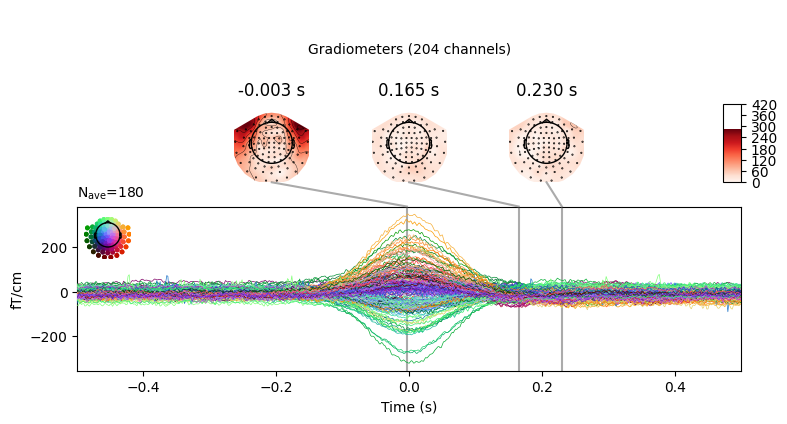

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


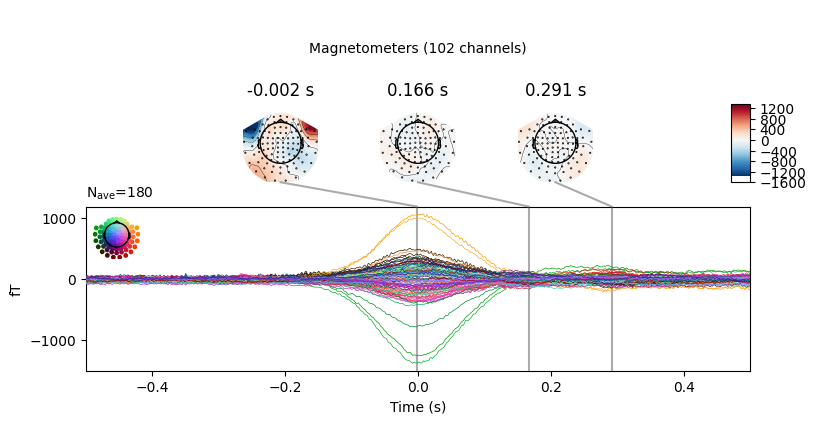

[<Figure size 800x420 with 7 Axes>, <Figure size 800x420 with 7 Axes>]

In [44]:
%matplotlib inline
eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
eog_evoked.plot_joint()

## How to repair some of artifacts

## Why do we use annotations?

In [4]:
%matplotlib qt
fig = raw.plot()
fig.fake_keypress("a")

Using matplotlib as 2D backend.


QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


Channels marked as bad:
none


In [5]:
raw.annotations

<Annotations | 7 segments: BAD_ (7)>

## Why do we use ICA?

In [4]:
ica = mne.preprocessing.ICA(n_components=15, max_iter="auto", random_state=97)
ica.fit(raw, reject_by_annotation=True)
ica

Fitting ICA to data using 306 channels (please be patient, this may take a while)
Selecting by number: 15 components


/home/user/Projects/NeuralGeometry/venv/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 308.0s.


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 393000 samples), 15 ICA components (306 PCA components available), channel types: mag, grad, no sources marked for exclusion>

In [21]:
explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of grad variance explained by all components: 0.9488029718950363
Fraction of mag variance explained by all components: 0.9995201624745248


## How ICA look like?

In [7]:
%matplotlib qt
fig = ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=16, n_times=393000
    Range : 183600 ... 576599 =    305.687 ...   960.014 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated


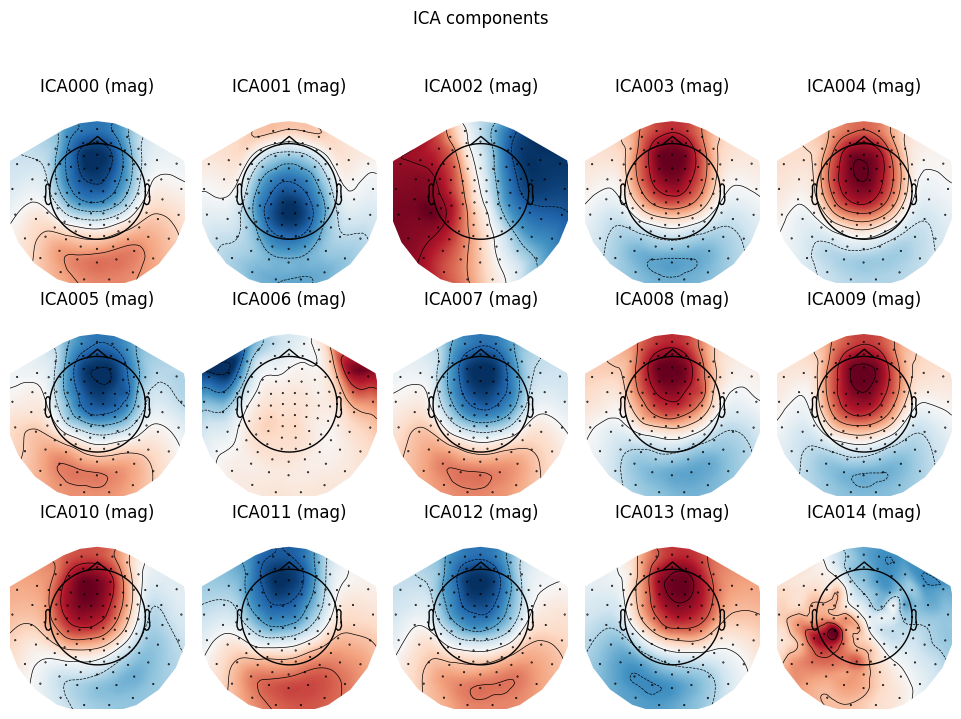

In [8]:
%matplotlib inline
fig = ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated


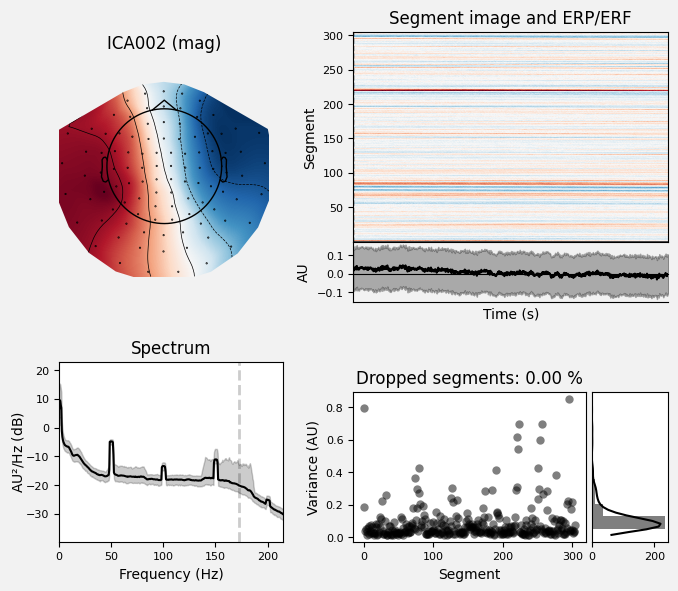

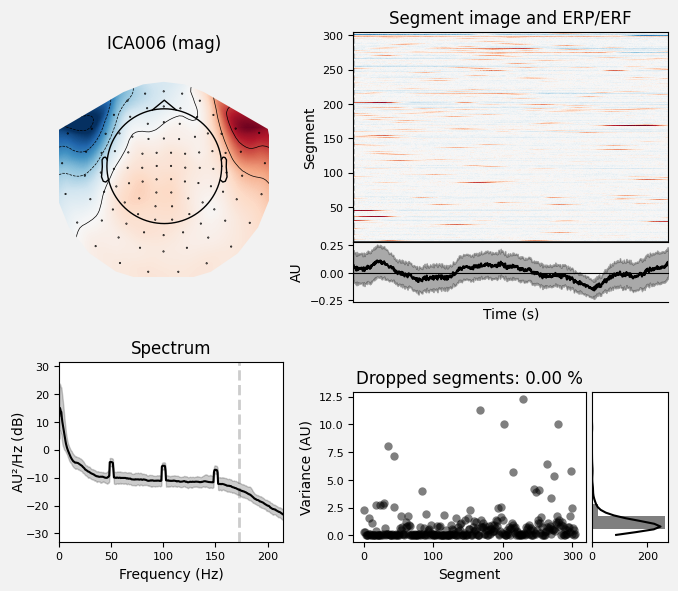

In [9]:
%matplotlib inline
fig = ica.plot_properties(raw, picks=[2, 6])

## How reconstructed data look like?

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 306 PCA components


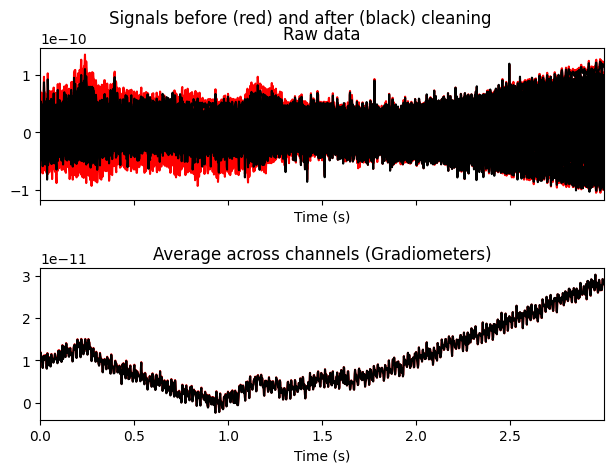

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 306 PCA components


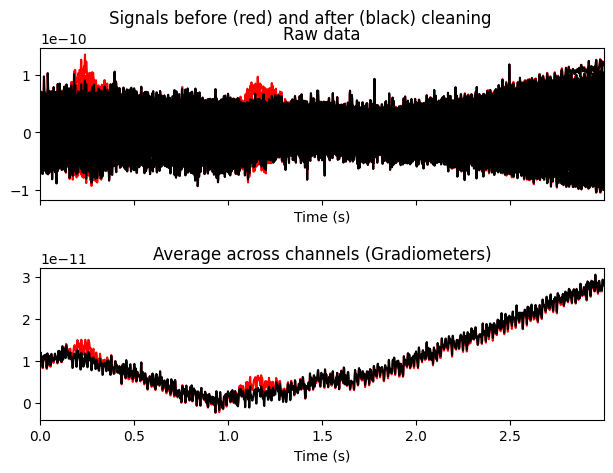

In [10]:
# blinks
fig = ica.plot_overlay(raw, exclude=[2], picks="grad")
# heartbeats
fig = ica.plot_overlay(raw, exclude=[6], picks="grad")

## Auto EOG detection

In [5]:
eog_indices, eog_scores = ica.find_bads_eog(raw)

Using EOG channel: EOG 061
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 s)



[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


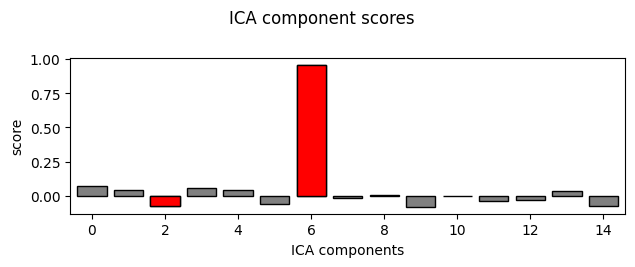

In [18]:
%matplotlib inline
fig = ica.plot_scores(eog_scores)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
305 matching events found
No baseline correction applied
0 projection items activated


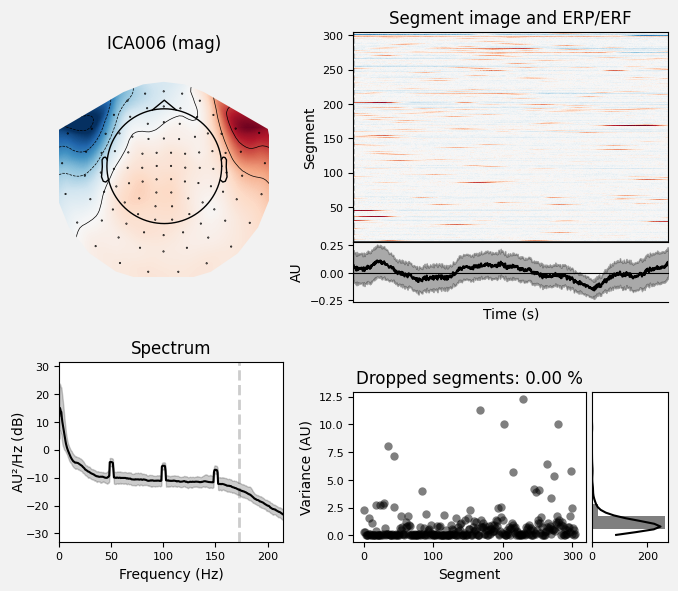

In [19]:
%matplotlib inline
fig = ica.plot_properties(raw, picks=eog_indices)

## Repair artifacts

In [23]:
ica.exclude

[]

In [6]:
ica.exclude = eog_indices

In [7]:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 306 PCA components


<Raw | multimodal_raw.fif, 316 x 393000 (654.3 s), ~950.7 MB, data loaded>

In [9]:
%matplotlib qt
fig1 = raw.plot()
fig2 = reconst_raw.plot()

Using matplotlib as 2D backend.


QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


Channels marked as bad:
none
Channels marked as bad:
none


## What is wrong here?

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 17628 of 393000 (4.49%) samples to NaN, retaining 375372 (95.51%) samples.
Effective window size : 3.410 (s)


/home/user/Projects/NeuralGeometry/venv/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


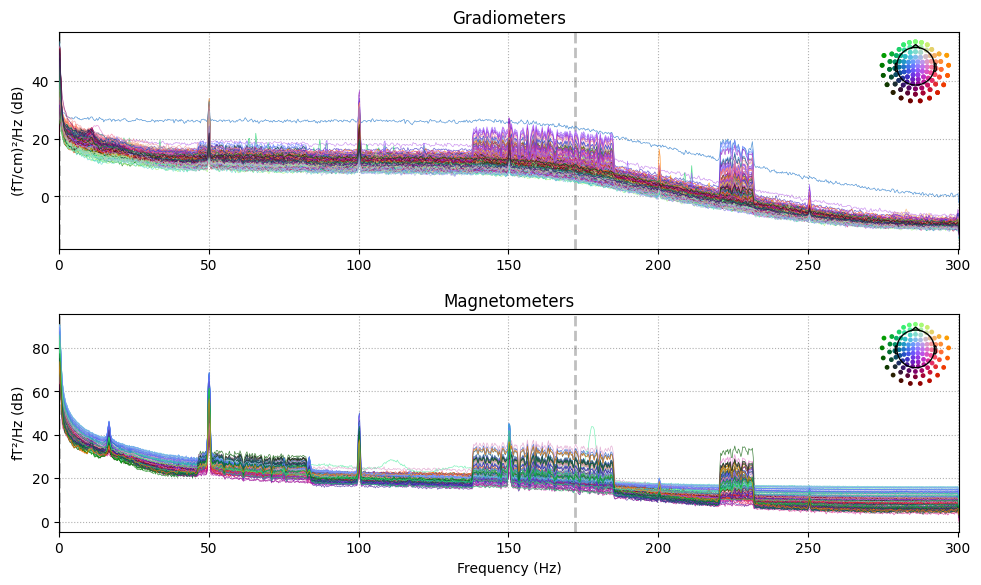

In [242]:
%matplotlib inline
fig = reconst_raw.plot_psd()

In [8]:
reconst_raw.notch_filter([50, 100, 150, 200, 250])

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    3.5s finished


<Raw | multimodal_raw.fif, 316 x 393000 (654.3 s), ~950.7 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 17628 of 393000 (4.49%) samples to NaN, retaining 375372 (95.51%) samples.
Effective window size : 3.410 (s)


/home/user/Projects/NeuralGeometry/venv/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


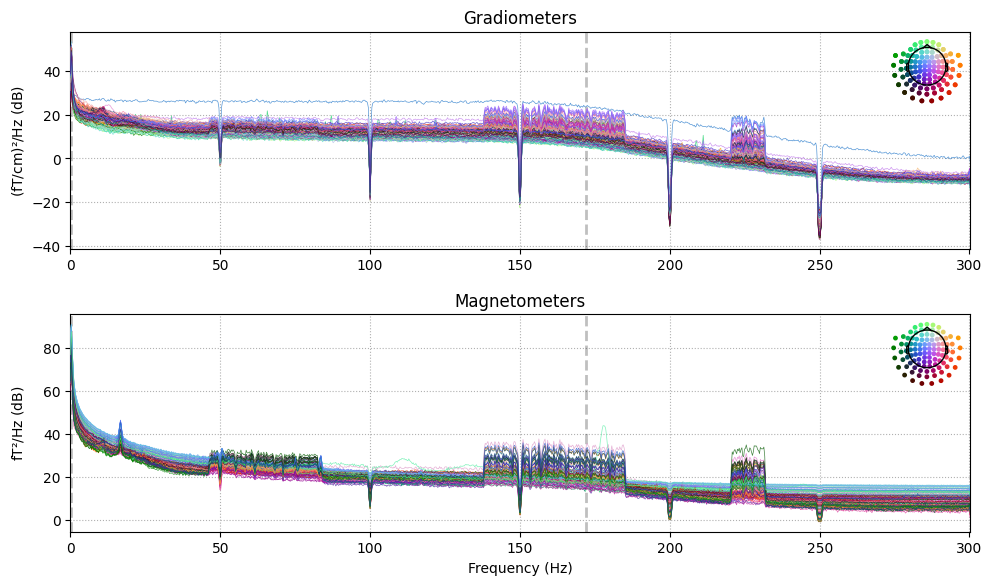

In [244]:
%matplotlib inline
fig = reconst_raw.plot_psd()

## Working with events

## STIM channels

In [86]:
%matplotlib qt
fig = reconst_raw.copy().pick_types(stim=True).plot()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | grad_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | grad_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v1, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v2, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v3, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v4, active : False, n_channels : 306>
Removing projector <Projection | mag_ssp_upright.fif : PCA-v5, active : False, n_channels : 306>


Channels marked as bad:
none


## A bit of python:)

In [11]:
ch_types = raw.get_channel_types()
ch_names = raw.ch_names
stim_channels = list(
    map(
        lambda item: item[1],
        filter(
            lambda item: ch_types[item[0]] == "stim", enumerate(ch_names)
        )
    )
)
stim_channels

['STI 001',
 'STI 002',
 'STI 003',
 'STI 004',
 'STI 005',
 'STI 006',
 'STI 014',
 'STI 015',
 'STI 016']

In [9]:
events = mne.find_events(reconst_raw, stim_channel='STI 014', min_duration=0.002)
len(events)

941 events found
Event IDs: [ 1  2  3  4  5  8 16 32]


941

In [ ]:
# from stim vs from parser
# 1 ~ 1
# 2 ~ 2
# 4 ~ 3
# 8 ~ 4
# 16 ~ 5
# 32 ~ 6
# 3 ~ 7
# 5 ~ 8

### Usually we know about human-readable names of events from csv-tables with behavioural data

In [10]:
event_dict = {
    'Visual/Upper/Right': 1,
    'Visual/Lower/Right': 2,
    'Auditory/Right': 3,
    'Visual/Lower/Left': 4,
    'Auditory/Left': 5,
    'Visual/Upper/Left': 8,
    'Somato/Right': 16,
    'Somato/Left': 32,
}

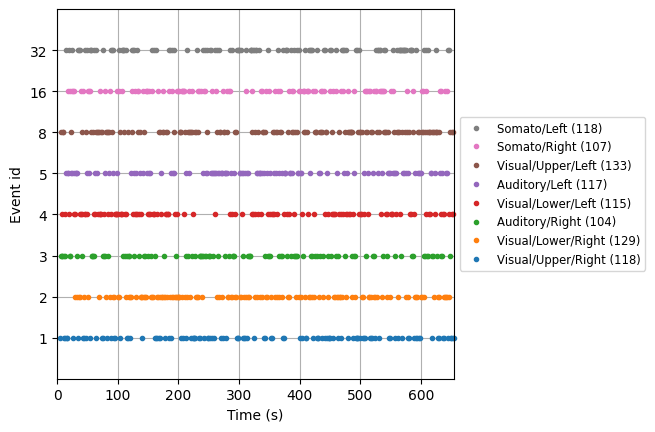

In [14]:
%matplotlib inline
fig = mne.viz.plot_events(
    events, sfreq=reconst_raw.info["sfreq"], first_samp=reconst_raw.first_samp, event_id=event_dict
)

## Visualize events

In [247]:
%matplotlib qt
fig = reconst_raw.plot(
    events=events,
    event_id=event_dict,
    event_color={1: "red", 2: "green", 3: "blue", 4: "yellow", 5: "pink", 8: "cyan", 16: "magenta", 32: "black"},
)

Channels marked as bad:
none


## Epoching data

In [11]:
epochs = mne.Epochs(reconst_raw, events, tmin=-0.2, tmax=0.5, event_id=event_dict, preload=True, baseline=None)

Not setting metadata
941 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 7)
7 projection items activated
Using data from preloaded Raw for 941 events and 421 original time points ...
1 bad epochs dropped


In [249]:
%matplotlib qt
fig = epochs.plot()

: 

## Power of dictionary

In [210]:
%matplotlib qt
fig = epochs['Somato/Left'].plot()

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


## Power of slash

In [212]:
%matplotlib qt
fig = epochs['Left'].plot()

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


## Evoked response

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


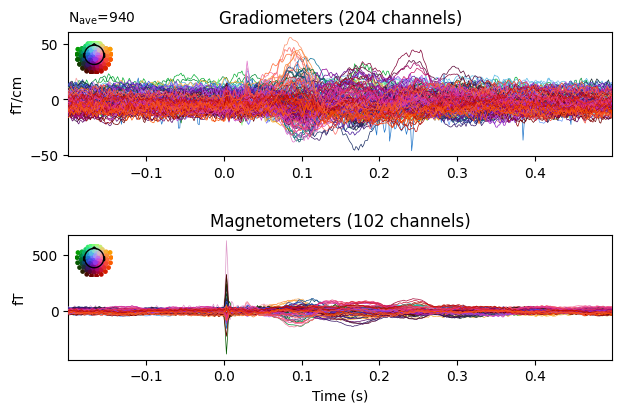

In [16]:
%matplotlib inline
fig = epochs.average().plot()

## Importance of a baseline

In [94]:
epochs.apply_baseline((None, 0.))

Applying baseline correction (mode: mean)


<Epochs |  940 events (all good), -0.199795 – 0.499488 s, baseline -0.199795 – 0 s, ~957.4 MB, data loaded,
 'Visual/Upper/Right': 117
 'Visual/Lower/Right': 129
 'Auditory/Right': 104
 'Visual/Lower/Left': 115
 'Auditory/Left': 117
 'Visual/Upper/Left': 133
 'Somato/Right': 107
 'Somato/Left': 118>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


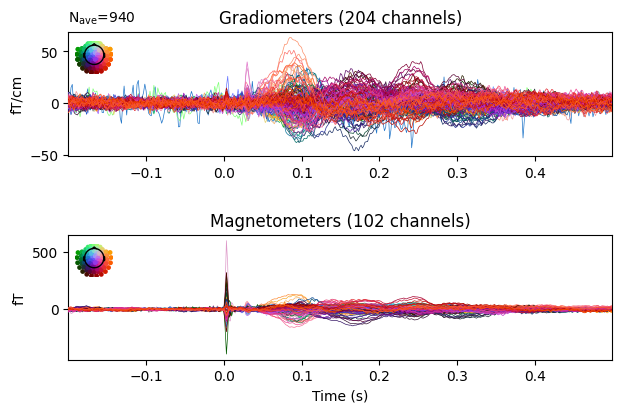

In [18]:
%matplotlib inline
fig = epochs.average().plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


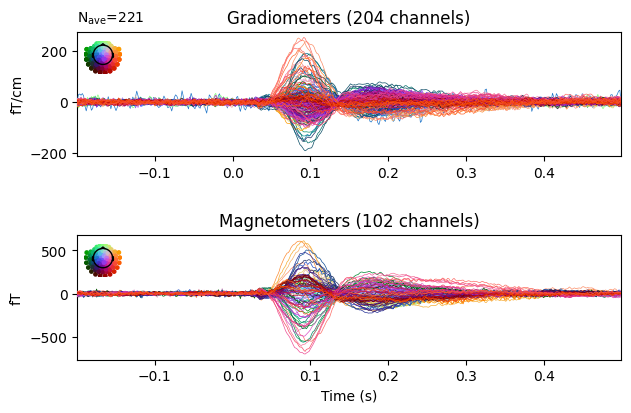

In [19]:
%matplotlib inline
fig = epochs['Auditory'].average().plot()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


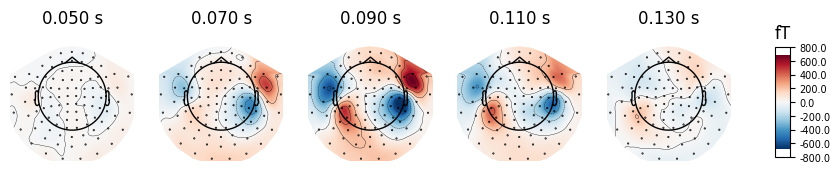

In [20]:
%matplotlib inline
times = np.linspace(0.05, 0.13, 5)
fig = epochs['Auditory'].average().plot_topomap(ch_type="mag", times=times, colorbar=True)

## Importance of spectrum

[convolution](https://en.wikipedia.org/wiki/Convolution)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


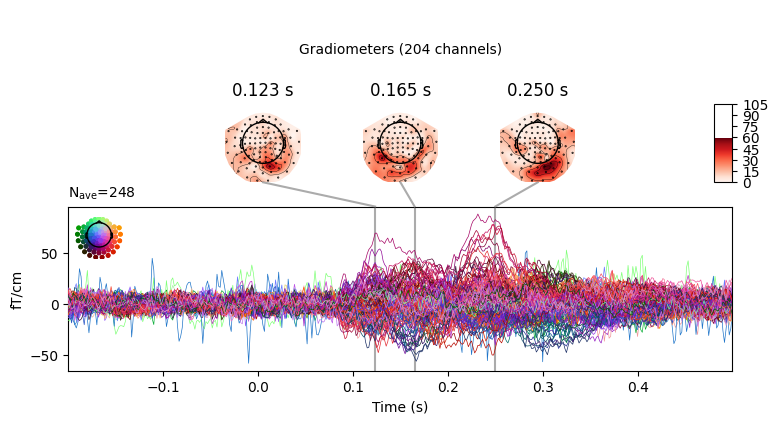

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


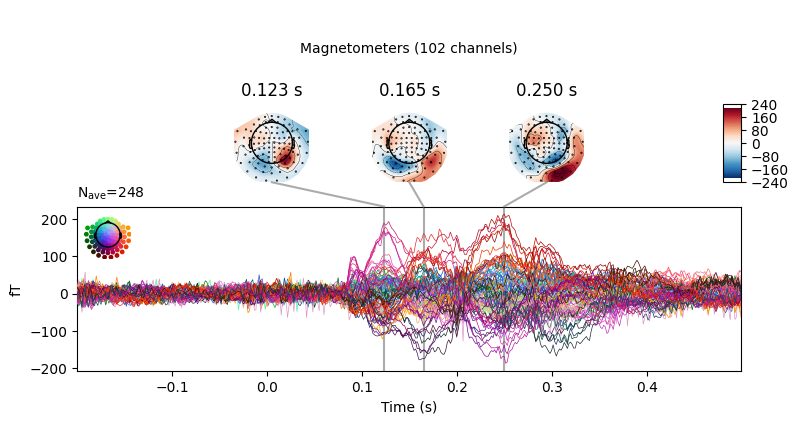

In [21]:
%matplotlib inline
fig = epochs['Visual/Left'].average().plot_joint()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


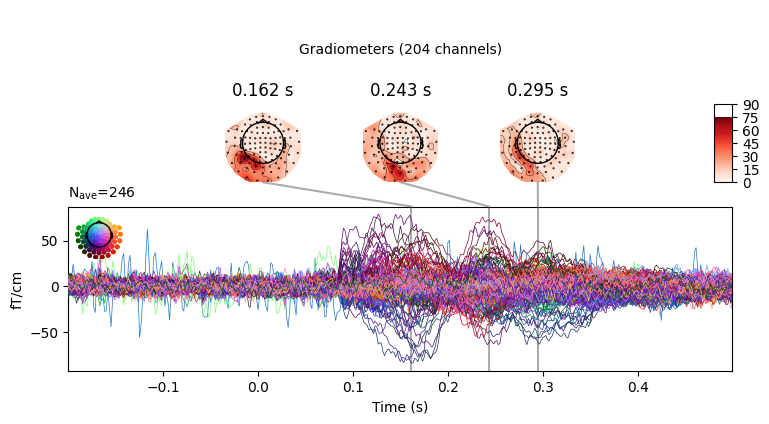

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


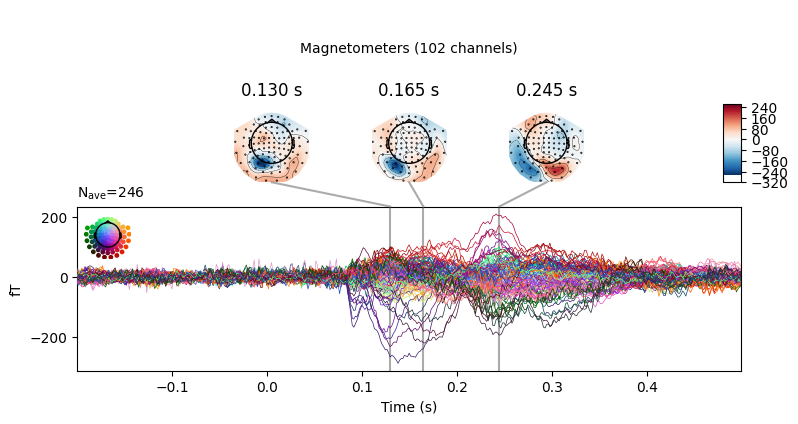

In [22]:
%matplotlib inline
fig = epochs['Visual/Right'].average().plot_joint()

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (1.101 s)



/tmp/ipykernel_4549/3108666280.py:2: RuntimeWarning: filter_length (661) is longer than the signal (421), distortion is likely. Reduce filter length or filter a longer signal.
  fig = epochs['Visual/Left'].copy().filter(12, 30).average().plot_joint()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done 75888 out of 75888 | elapsed:   12.1s finished


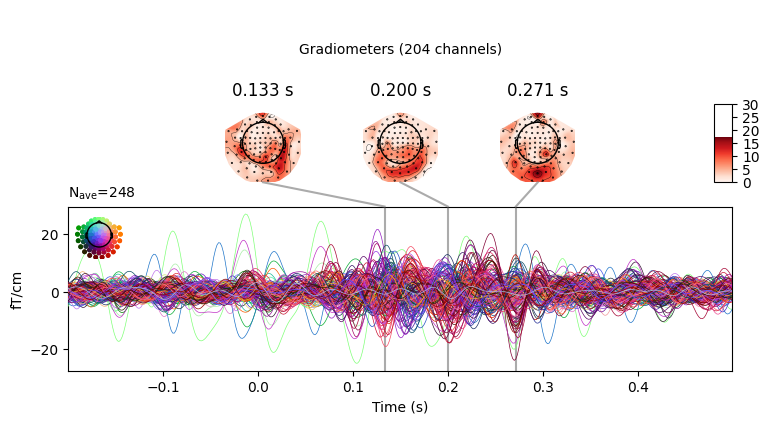

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


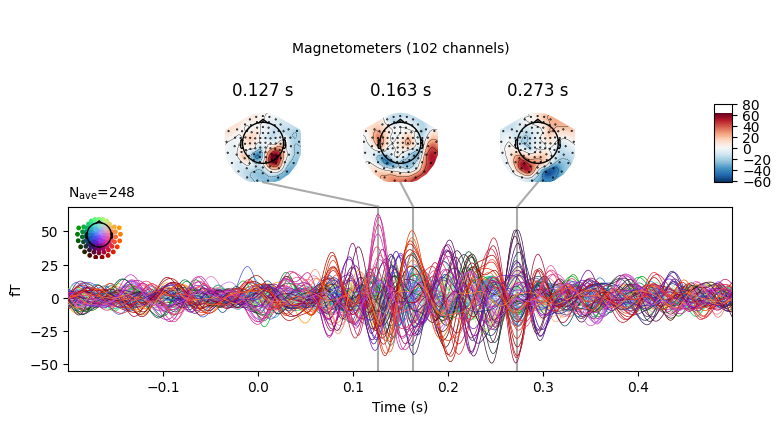

In [23]:
%matplotlib inline
fig = epochs['Visual/Left'].copy().filter(12, 30).average().plot_joint()

Setting up band-pass filter from 12 - 30 Hz



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (1.101 s)



/tmp/ipykernel_4549/4230678320.py:2: RuntimeWarning: filter_length (661) is longer than the signal (421), distortion is likely. Reduce filter length or filter a longer signal.
  fig = epochs['Visual/Right'].copy().filter(12, 30).average().plot_joint()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done 75276 out of 75276 | elapsed:   12.2s finished


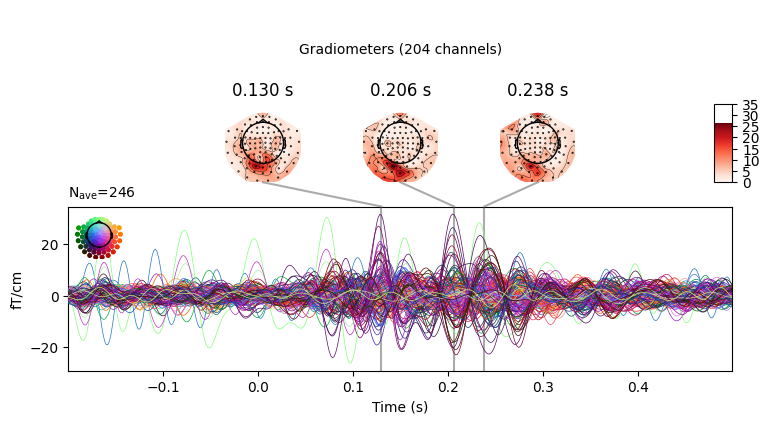

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


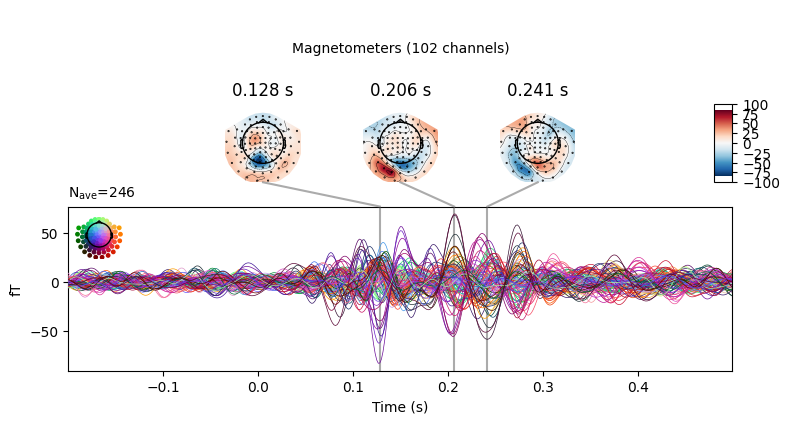

In [24]:
%matplotlib inline
fig = epochs['Visual/Right'].copy().filter(12, 30).average().plot_joint()

## Before go to statistics

## Compare evoked responses for different conditions

In [76]:
tmin = -0.2
tmax = 0.5

evokeds = [epochs[name].average() for name in ("Left", "Right")]

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


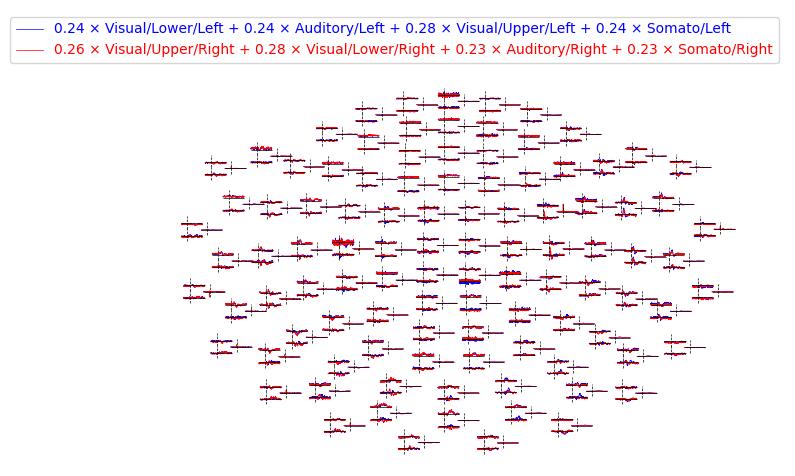

In [77]:
colors = "blue", "red"
mne.viz.plot_evoked_topo(evokeds, color=colors, background_color="w")

plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


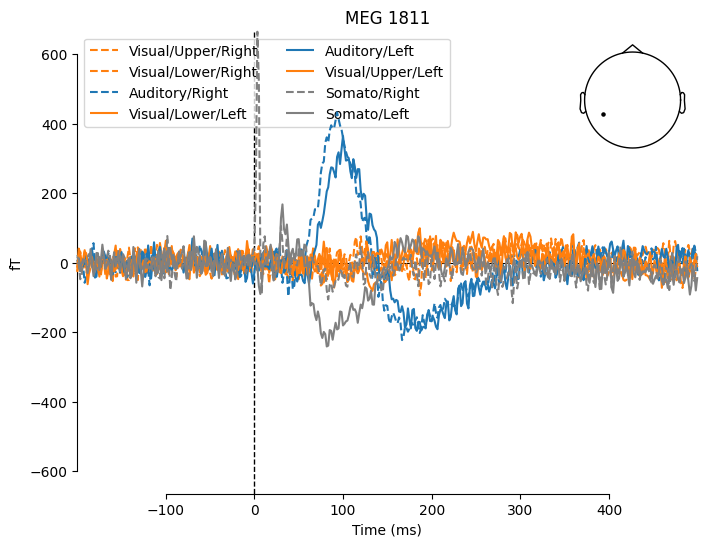

[<Figure size 800x600 with 2 Axes>]

In [95]:
evks = epochs.average(by_event_type=True)

mne.viz.plot_compare_evokeds(
    evks,
    picks="MEG 1811",
    colors=dict(Auditory=0, Visual=1),
    linestyles=dict(Left="solid", Right="dashed"),
    time_unit="ms",
)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


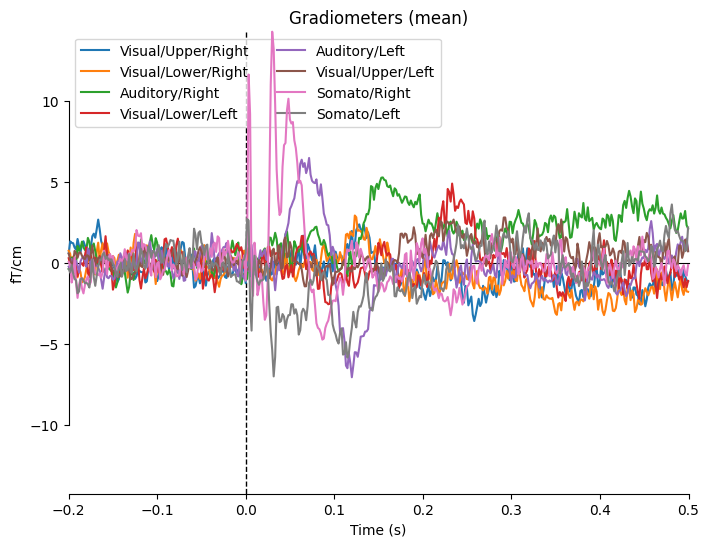

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


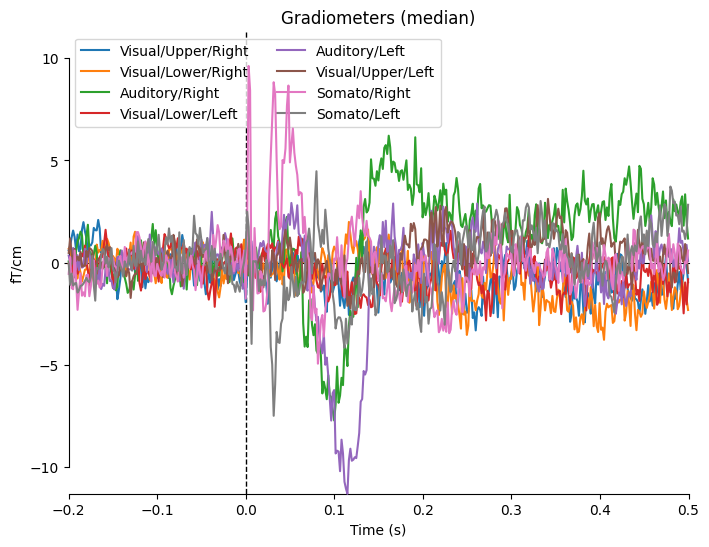

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


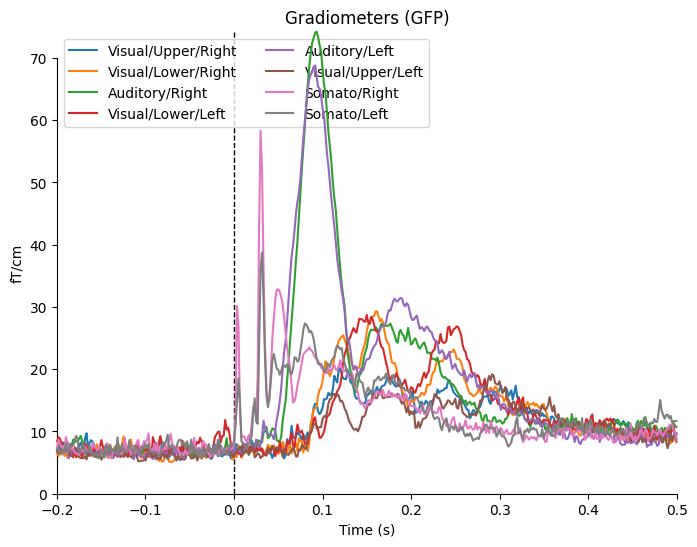

combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"
combining channels using "<function custom_func at 0x7fd71e67e200>"


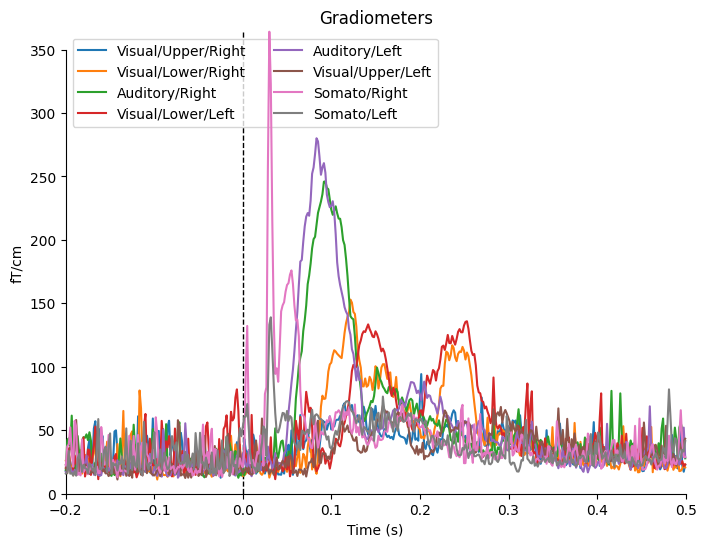

In [96]:
def custom_func(x):
    return x.max(axis=1)

for combine in ("mean", "median", "gfp", custom_func):
    mne.viz.plot_compare_evokeds(evks, picks="grad", combine=combine)

## Permutation t test

## Here we check if signal significantly deviates from 0 during a fixed time window of interest

[permutation test](https://en.wikipedia.org/wiki/Permutation_test)

In [103]:
picks = mne.pick_types(
    epochs.info, meg="grad", eeg=False, stim=False, eog=False, exclude="bads"
)
epochs_grad = epochs['Somato/Right'].copy().pick_types(meg='grad')
data = epochs_grad.get_data()
times = epochs.times

temporal_mask = np.logical_and(0.04 <= times, times <= 0.6)
data = np.mean(data[:, :, temporal_mask], axis=2)

n_permutations = 50000
T0, p_values, H0 = mne.stats.permutation_t_test(data, n_permutations, n_jobs=None)

significant_sensors = picks[p_values <= 0.05]
significant_sensors_names = [raw.ch_names[k] for k in significant_sensors]

print("Number of significant sensors : %d" % len(significant_sensors))
print("Sensors names : %s" % significant_sensors_names)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


Permuting 49999 times...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Number of significant sensors : 9
Sensors names : ['MEG 0612', 'MEG 0623', 'MEG 0643', 'MEG 1132', 'MEG 1142', 'MEG 1143', 'MEG 1312', 'MEG 1343', 'MEG 2622']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


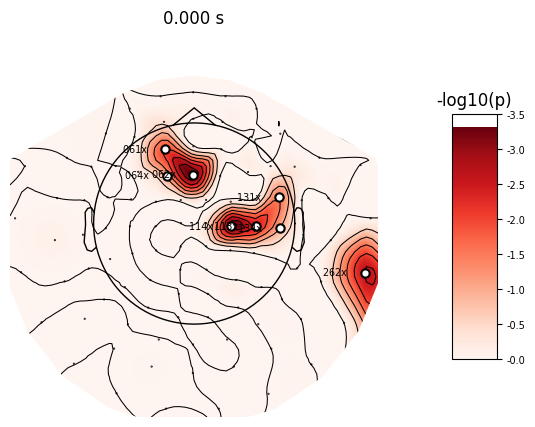

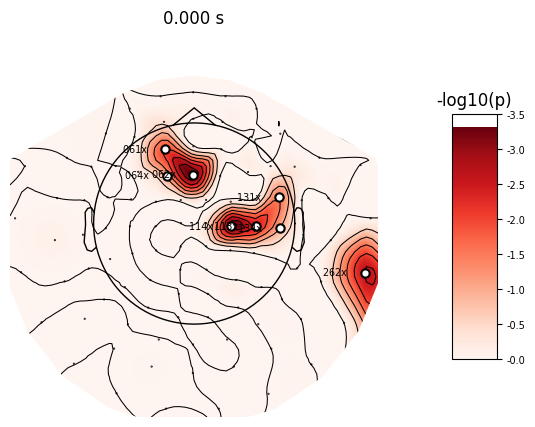

In [104]:
evoked = mne.EvokedArray(-np.log10(p_values)[:, np.newaxis], epochs_grad.info, tmin=0.0)

# Extract mask and indices of active sensors in the layout
stats_picks = mne.pick_channels(evoked.ch_names, significant_sensors_names)
mask = p_values[:, np.newaxis] <= 0.05

evoked.plot_topomap(
    ch_type="grad",
    times=[0],
    scalings=1,
    time_format=None,
    cmap="Reds",
    vlim=(0.0, np.max),
    units="-log10(p)",
    cbar_fmt="-%0.1f",
    mask=mask,
    size=3,
    show_names=lambda x: x[4:] + " " * 20,
    time_unit="s",
)

## Permutation F-test on sensor data with 1D cluster level

In [105]:
tmin = 0.0
tmax = 0.5

channel = "MEG 1332"  # include only this channel in analysis
include = [channel]

picks = mne.pick_types(raw.info, meg=False, eog=True, include=include, exclude="bads")

epochs1 = epochs['Auditory']
condition1 = epochs1.get_data()  # as 3D matrix

epochs2 = epochs['Somato']
condition2 = epochs2.get_data()  # as 3D matrix

condition1 = condition1[:, 0, :]  # take only one channel to get a 2D array
condition2 = condition2[:, 0, :]  # take only one channel to get a 2D array

In [106]:
threshold = 10.0
T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_test(
    [condition1, condition2],
    n_permutations=5000,
    threshold=threshold,
    tail=1,
    n_jobs=None,
    out_type="mask",
)

stat_fun(H1): min=0.000008 max=130.369730
Running initial clustering …
Found 10 clusters


100%|██████████| Permuting : 4999/4999 [00:04<00:00, 1109.54it/s]


Text(0, 0.5, 'f-values')

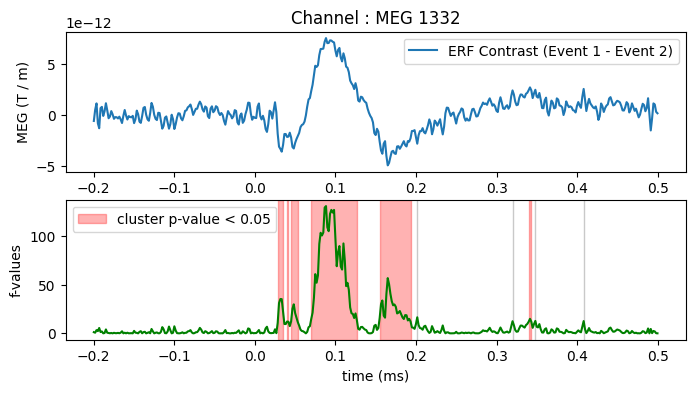

In [107]:
times = epochs1.times
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
ax.set_title("Channel : " + channel)
ax.plot(
    times,
    condition1.mean(axis=0) - condition2.mean(axis=0),
    label="ERF Contrast (Event 1 - Event 2)",
)
ax.set_ylabel("MEG (T / m)")
ax.legend()

for i_c, c in enumerate(clusters):
    c = c[0]
    if cluster_p_values[i_c] <= 0.05:
        h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
    else:
        ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), alpha=0.3)

hf = plt.plot(times, T_obs, "g")
ax2.legend((h,), ("cluster p-value < 0.05",))
ax2.set_xlabel("time (ms)")
ax2.set_ylabel("f-values")

## Spatiotemporal permutation F-test on full sensor data

In [135]:
epochs_eq = epochs.copy().pick_types(meg='grad')['Visual', 'Auditory'].equalize_event_counts(['Visual', 'Auditory'])[0]
X = np.array([epochs_eq[event_name].get_data() for event_name in ['Visual', 'Auditory']])

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Dropped 273 epochs: 0, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 85, 86, 87, 92, 93, 94, 95, 96, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 116, 119, 122, 123, 128, 129, 136, 139, 140, 145, 146, 147, 148, 153, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 186, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 235, 236, 237, 240, 241, 242, 243, 244, 321, 322, 323, 324, 325, 326, 337, 352, 353, 354, 355, 356, 369, 370, 373, 386, 387, 388, 389, 390, 391, 392, 397, 398, 399, 418, 443, 446, 447, 448, 449, 450, 451, 456, 459, 460, 461, 466, 467, 468, 475, 476, 479, 480, 481, 482, 483, 486, 489, 492, 493, 494, 495, 496, 497, 498, 501, 506, 507, 508, 509, 510, 511, 512, 513, 518, 521, 522, 523, 524, 525, 526, 527

In [136]:
X.shape

(2, 221, 204, 421)

In [137]:
X = np.transpose(X, (0, 1, 3, 2))

In [138]:
np.array(X).shape

(2, 221, 421, 204)

In [ ]:
tail = 1
alpha_cluster_forming = 0.001
n_conditions = len(event_dict)
n_observations = len(X[0])
dfn = n_conditions - 1
dfd = n_observations - n_conditions
f_thresh = sp.stats.f.ppf(1 - alpha_cluster_forming, dfn=dfn, dfd=dfd)
F_obs, clusters, p_values, _ = mne.stats.spatio_temporal_cluster_test(
    X,
    n_permutations=1000,
    threshold=f_thresh,
    tail=tail,
    n_jobs=None,
    buffer_size=None,
)

In [156]:
mne.set_log_level("ERROR")

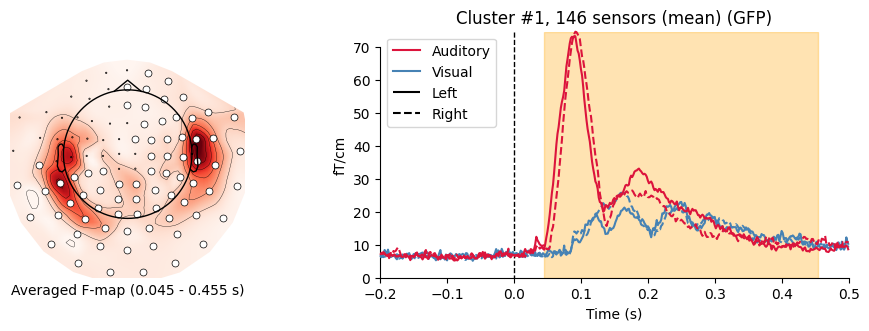

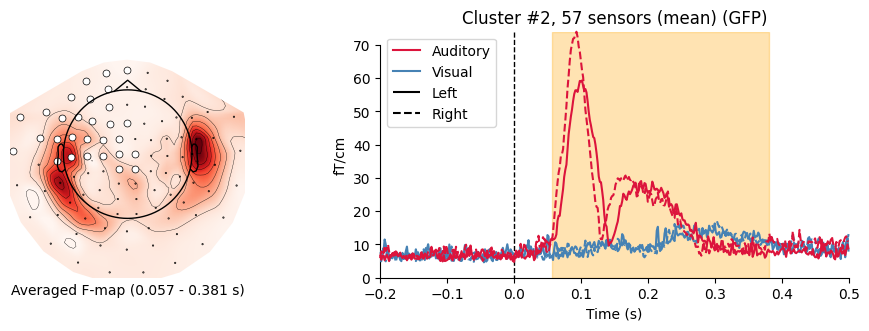

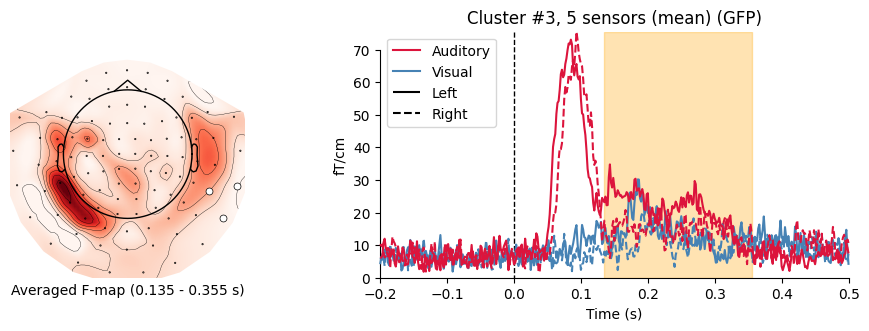

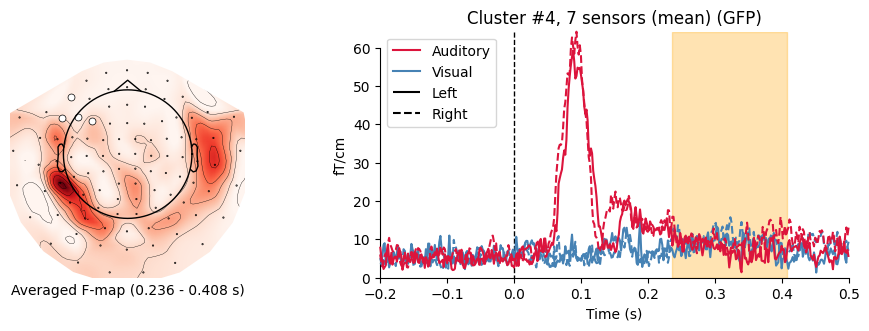

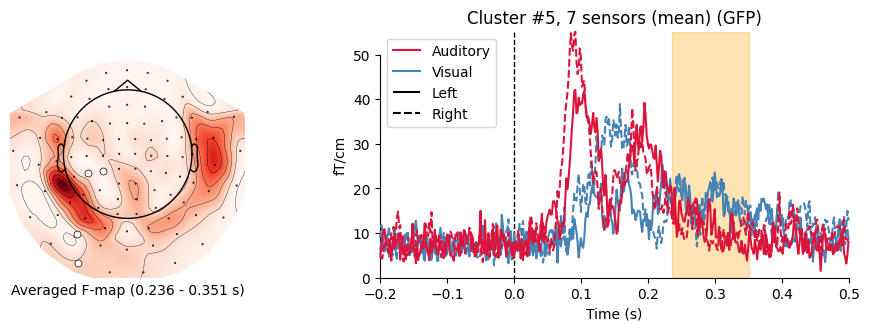

In [169]:
# We subselect clusters that we consider significant at an arbitrarily
# picked alpha level: "p_accept".
# NOTE: remember the caveats with respect to "significant" clusters that
# we mentioned in the introduction of this tutorial!
p_accept = 0.01
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = {"Auditory": "crimson", "Visual": "steelblue"}
linestyles = {"Left": "-", "Right": "--"}

# organize data for plotting
evokeds = {cond: epochs_eq[cond].average() for cond in ['Visual/Left', 'Visual/Right', 'Auditory/Left', 'Auditory/Right']}

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # get topography for F stat
    f_map = F_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = epochs.times[time_inds]

    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, (ax_topo, ax_signals) = plt.subplots(1, 2, figsize=(10, 3))

    # plot average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs_eq.info, tmin=0)
    f_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        cmap="Reds",
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params=dict(markersize=10),
    )
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # add axes for colorbar
    ax_topo.set_xlabel(
        "Averaged F-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
    )

    # add new axis for time courses and plot time courses
    title = "Cluster #{0}, {1} sensor".format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(
        evokeds,
        title=title,
        picks=ch_inds,
        axes=ax_signals,
        colors=colors,
        linestyles=linestyles,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
    )

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx(
        (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
    )

    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=0.05)
    plt.show()

## Frequency and time-frequency sensor analysis

In [13]:
psd = epochs.compute_psd(fmin=2.0, fmax=40.0)

    Using multitaper spectrum estimation with 7 DPSS windows


Averaging across epochs...


/home/user/Projects/NeuralGeometry/venv/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


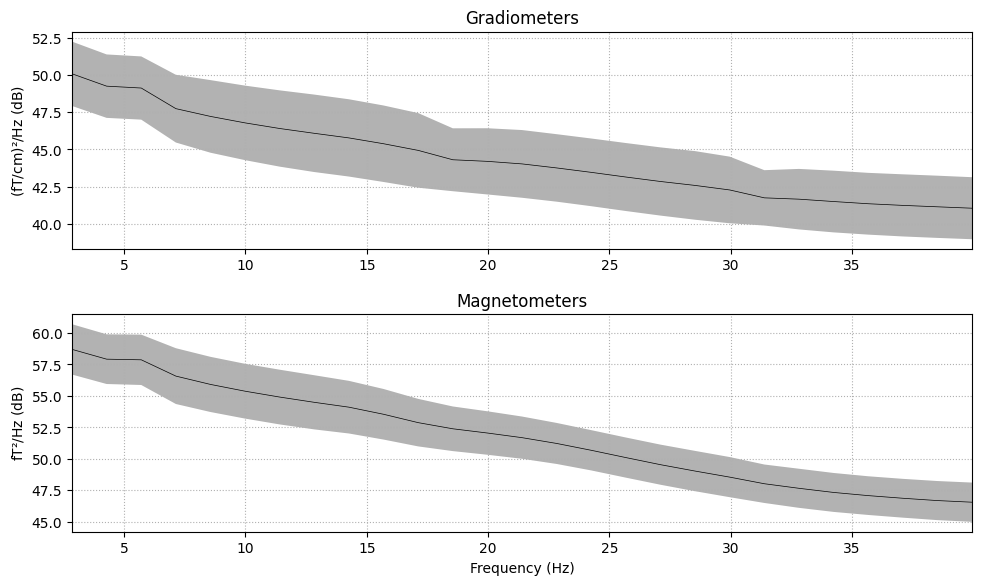

In [14]:
fig = psd.plot(average=True, picks="data", exclude="bads")

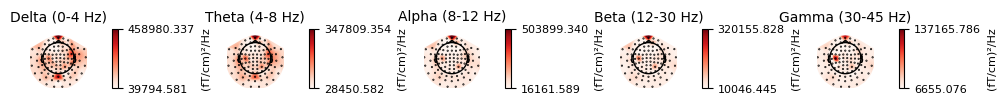

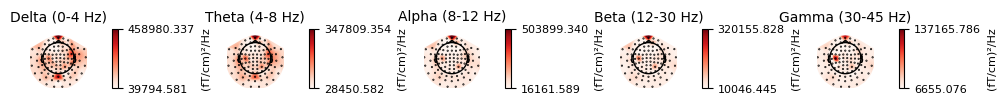

In [16]:
fig = psd.plot_topomap(ch_type="grad", normalize=False, contours=0)

In [17]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs // 4.  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(
    epochs,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=3,
    n_jobs=None,
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:  1.2min finished


Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


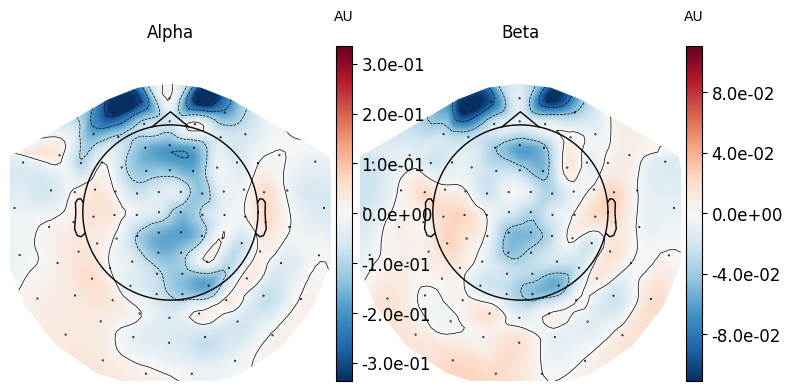

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
topomap_kw = dict(
    ch_type="grad", tmin=0.1, tmax=.5, baseline=(-0.2, 0), mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)
plt.show()

Applying baseline correction (mode: logratio)


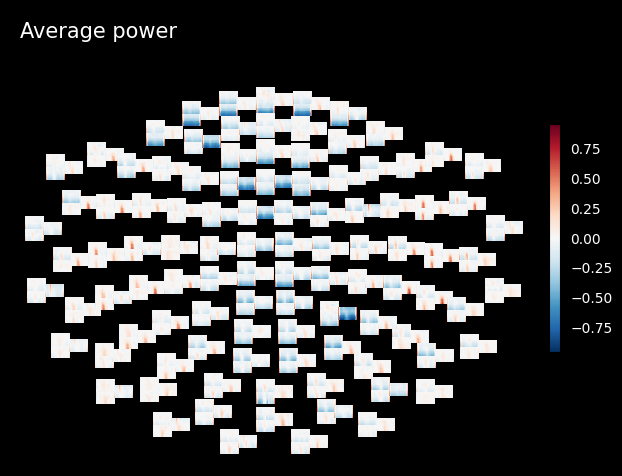

In [46]:
fig = power.plot_topo(baseline=(-0.2, 0), mode="logratio", title="Average power")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


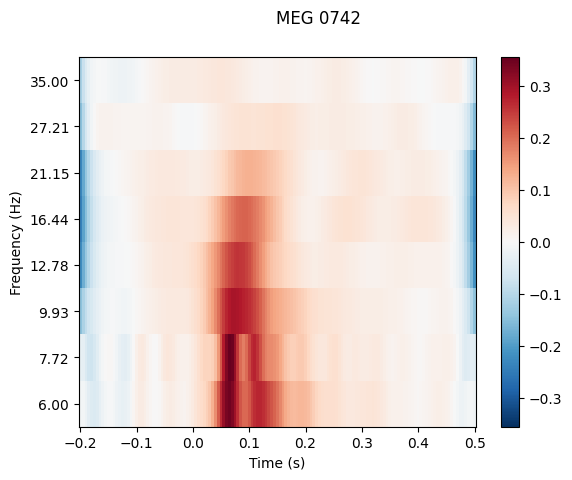

In [47]:
fig = power.plot([23], baseline=(-0.2, 0), mode="logratio", title=power.ch_names[82])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Multiple channel types selected, returning one figure per type.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


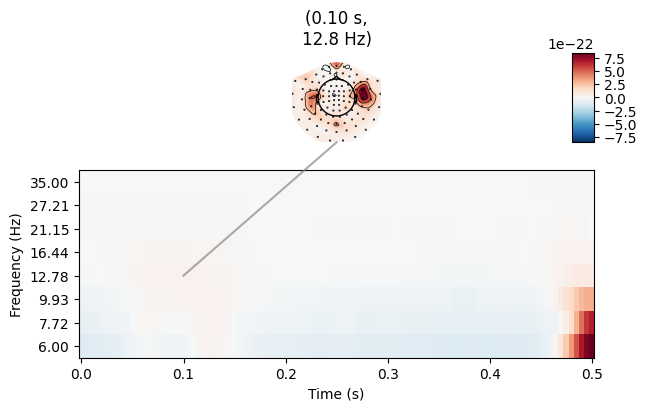

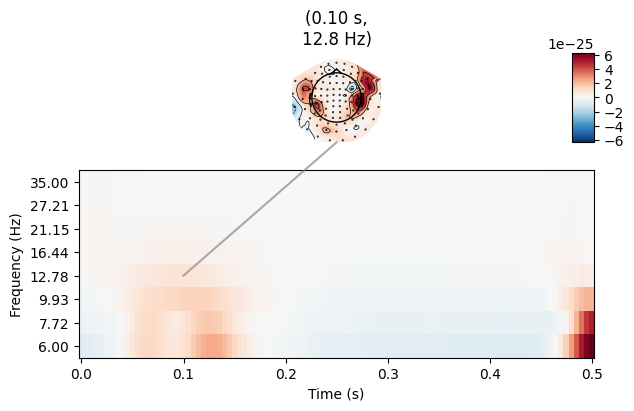

In [51]:
fig = power.plot_joint(
    baseline=(-0.2, 0), mode="mean", tmin=-0., tmax=.5, timefreqs=[(0.1, 12)]
)
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Multiple channel types selected, returning one figure per type.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


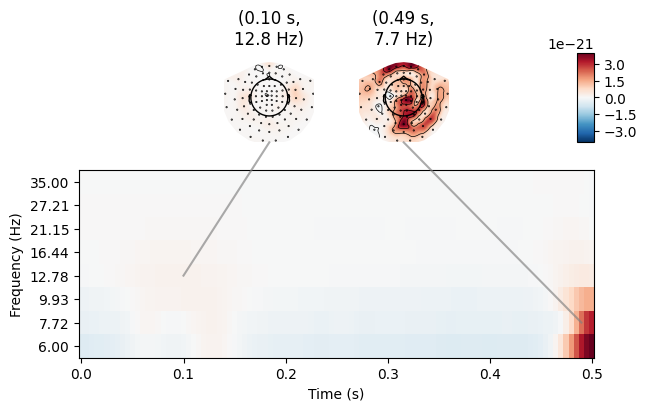

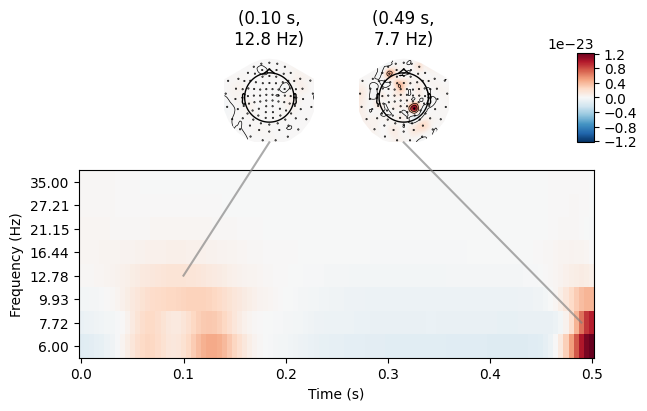

In [50]:
fig = power.plot_joint(
    baseline=(-0.2, 0), mode="mean", tmin=-0., tmax=.5, timefreqs=[(0.1, 12), (0.49, 8)]
)
plt.show()

No baseline correction applied


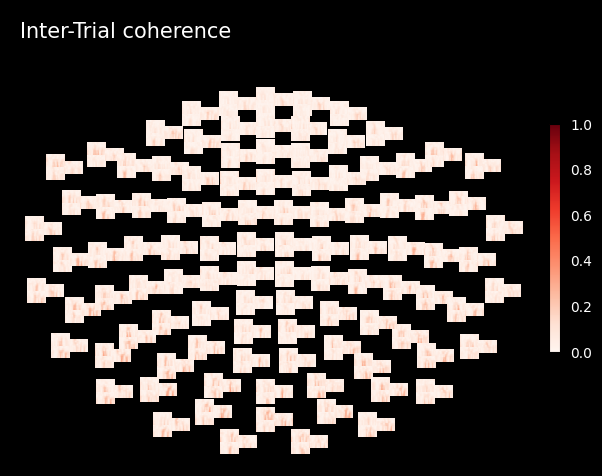

In [41]:
fig = itc.plot_topo(title="Inter-Trial coherence", vmin=0.0, vmax=1.0, cmap="Reds")